In [1]:
# import packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Installed torchvision 0.16.2, earlier version 0.15.x does not compatible with pytorch version
!pip install torchvision==0.16.2

In [3]:
import torchvision
torchvision.__version__

'0.16.2'

In [4]:
# check mps is available
cuda = torch.device("mps")
print("MPS Available?", cuda)

MPS Available? mps


In [5]:
from model import Net
from utils import apply_transformations, create_train_test_dataset, train, test

In [6]:
# Load transformations
train_transforms, test_transforms = apply_transformations()


In [7]:
# create train and test data
train_data,test_data = create_train_test_dataset(train_transforms, test_transforms)



In [8]:
# define Network parameters

batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

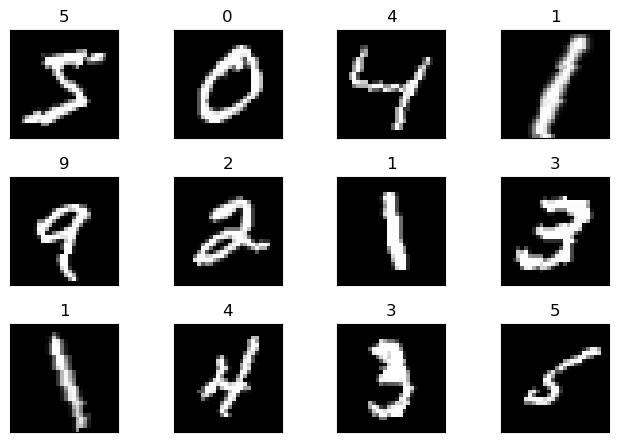

In [9]:
# Plot a sample images
import matplotlib.pyplot as plt
warnings. filterwarnings('ignore')

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [10]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [12]:
# Run Network and records metrics
from model import Net
from utils import apply_transformations, create_train_test_dataset, train, test, get_correct_pred_count

import warnings
warnings.filterwarnings('ignore')


device = torch.device("mps")
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    epoch_train_acc, epoch_train_loss = train(model, device, train_loader, optimizer, criterion)
    epoch_test_acc, epoch_test_loss = test(model, device, test_loader, criterion)
    train_losses.append(epoch_train_loss)
    train_acc.append(epoch_train_acc)
    test_losses.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.8458 Batch_id=117 Accuracy=43.64: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:08<00:00, 13.91it/s]


Test set: Average loss: 0.0017, Accuracy: 7430/10000 (74.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.4706 Batch_id=117 Accuracy=80.93: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.63it/s]


Test set: Average loss: 0.0009, Accuracy: 8582/10000 (85.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.3711 Batch_id=117 Accuracy=89.51: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.54it/s]


Test set: Average loss: 0.0005, Accuracy: 9246/10000 (92.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.3268 Batch_id=117 Accuracy=92.69: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.43it/s]


Test set: Average loss: 0.0004, Accuracy: 9462/10000 (94.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.2900 Batch_id=117 Accuracy=94.46: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.69it/s]


Test set: Average loss: 0.0003, Accuracy: 9544/10000 (95.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.2809 Batch_id=117 Accuracy=95.22: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.97it/s]


Test set: Average loss: 0.0003, Accuracy: 9607/10000 (96.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.2355 Batch_id=117 Accuracy=95.87: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 16.07it/s]


Test set: Average loss: 0.0002, Accuracy: 9735/10000 (97.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.2294 Batch_id=117 Accuracy=96.14: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 14.78it/s]


Test set: Average loss: 0.0002, Accuracy: 9739/10000 (97.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.2784 Batch_id=117 Accuracy=96.58: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.83it/s]


Test set: Average loss: 0.0002, Accuracy: 9768/10000 (97.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.2197 Batch_id=117 Accuracy=96.87: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.73it/s]


Test set: Average loss: 0.0002, Accuracy: 9787/10000 (97.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.2106 Batch_id=117 Accuracy=97.02: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.43it/s]


Test set: Average loss: 0.0002, Accuracy: 9799/10000 (97.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.3144 Batch_id=117 Accuracy=97.33: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.82it/s]


Test set: Average loss: 0.0002, Accuracy: 9800/10000 (98.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.2218 Batch_id=117 Accuracy=97.53: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.95it/s]


Test set: Average loss: 0.0001, Accuracy: 9827/10000 (98.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.3044 Batch_id=117 Accuracy=97.51: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.78it/s]


Test set: Average loss: 0.0001, Accuracy: 9827/10000 (98.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.1991 Batch_id=117 Accuracy=97.67: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.36it/s]


Test set: Average loss: 0.0001, Accuracy: 9818/10000 (98.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.2669 Batch_id=117 Accuracy=97.90: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.87it/s]


Test set: Average loss: 0.0001, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.1516 Batch_id=117 Accuracy=97.92: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 16.03it/s]


Test set: Average loss: 0.0001, Accuracy: 9856/10000 (98.56%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.1798 Batch_id=117 Accuracy=97.93: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.63it/s]


Test set: Average loss: 0.0001, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.1598 Batch_id=117 Accuracy=98.06: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:09<00:00, 13.07it/s]


Test set: Average loss: 0.0001, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.1576 Batch_id=117 Accuracy=97.99: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:07<00:00, 15.77it/s]


Test set: Average loss: 0.0001, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

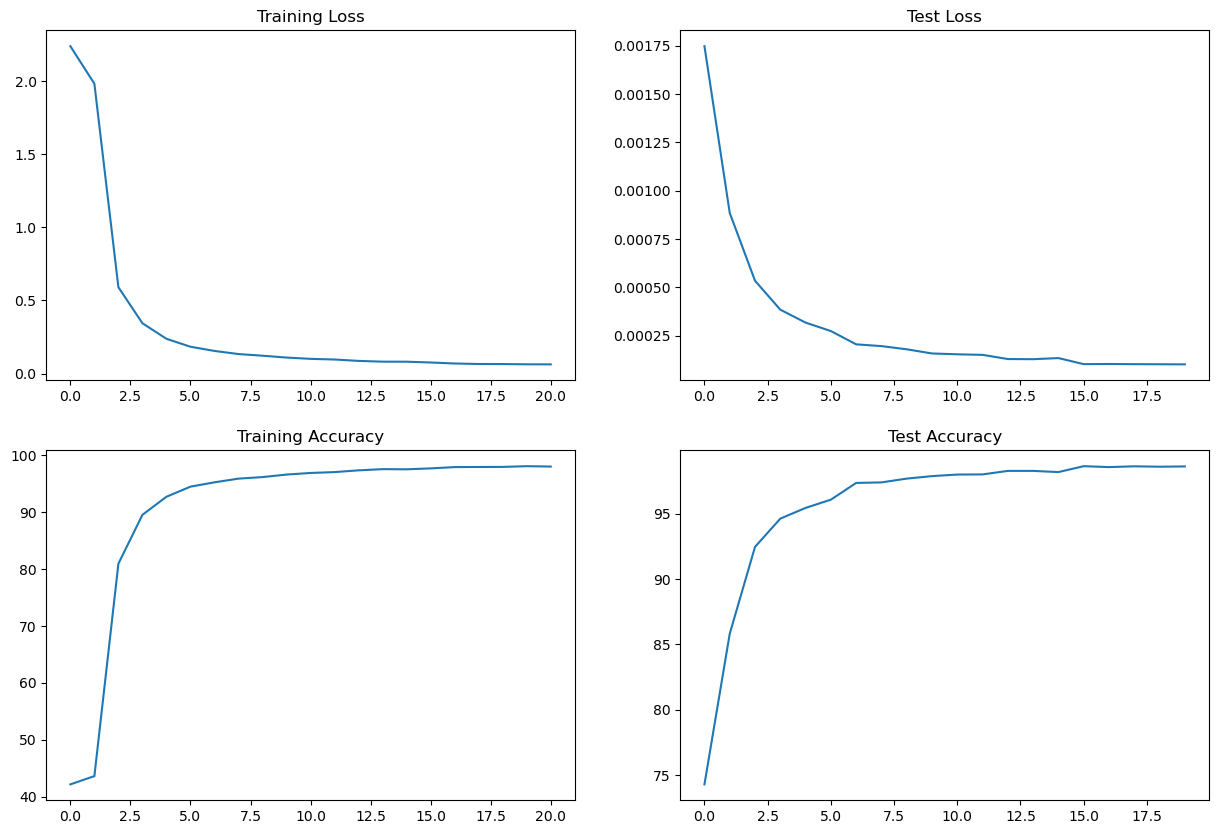

In [13]:
# Plot Network metrics
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses )
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [14]:
# Print Network Model summary
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 593,140
Trainable params: 593,140
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
